# Dataset and Data Understanding
# "The Office" Script Lines

This notebook aims to give an overview over the subsequent NLP driven analyis of all spoken lines in the US-American TV-show "The Office".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PATH = "../data/"
FILE = "the-office-lines_scripts.csv"

## The Dataset

In [2]:
df = pd.read_csv(PATH+FILE, sep=",", index_col="id")
df.head()

,season,episode,scene,line_text,speaker,deleted
id,,,,,,
1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
df.shape

(59911, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59911 entries, 1 to 59909
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     59911 non-null  int64 
 1   episode    59911 non-null  int64 
 2   scene      59911 non-null  int64 
 3   line_text  59911 non-null  object
 4   speaker    59911 non-null  object
 5   deleted    59911 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 2.8+ MB


- 59911 rows (=lines spoken in the show)
    - no missing values
    - correct dtypes
- 6 columns
    - The first three columns indicate the season, episode and scene number of the line. 
    - "line_text" contains the respective line in plain text and additional directionals (e.g. "Jim: [laughing] Hey, Pam!")
    - "speaker" shows the name of the person who said the corresponding line
    - "deleted" indicates whether or not the corresponding line made it into the final version of the show


In [5]:
df.describe(include="all")

,season,episode,scene,line_text,speaker,deleted
count,59911.000000,59911.000000,59911.000000,59911,59911,59911
unique,NaN,NaN,NaN,52187,794,2
top,NaN,NaN,NaN,Yeah.,Michael,False
freq,NaN,NaN,NaN,486,12137,57975
mean,5.348283,11.558295,27.143613,NaN,NaN,NaN
std,2.389458,6.986292,17.860703,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,3.000000,5.000000,14.000000,NaN,NaN,NaN
50%,5.000000,11.000000,25.000000,NaN,NaN,NaN
75%,7.000000,18.000000,37.000000,NaN,NaN,NaN


### Value Analysis
- 9 seasons with a maximum of 26 episodes with at most 116 scenes
- 50668 of the 59911 spoken lines are unique
- "Yeah." is the most frequently spoken line with a total of 486 occurrences
- there are 794 different people speaking throughout the show
- Michael is the character with the most lines with total number of 12137 lines
- 57975 of the available 59911 lines actually made it into the final version of the show

### Data Quality
A few lines were  missing (line break not working). Those were looked at and manually corrected in the csv before loading.
### Limitations
- very few missing lines in scenes (discovered by watching the show and checking the dataset)
- only few directorials; don’t describe everything that happens on screen (context is lost in some cases  (semantic gap))
- "show within a show" scenes (e.g. when characters are watching TV / are listing to the radio) are displayed in a unclear manor
- only few features; more features describing the scenes would improve analytical options (e.g. where the scene takes place, …)
- some episodes seem to be missing (further research showed that there are no missing episodes, but double episodes (e.g. season 2, episode 1 and 2 are listed as one episode in the dataset; confirmed by checking the number of double episodes per season https://en.wikipedia.org/wiki/List_of_The_Office_(American_TV_series)_episodes and watching the respective episodes and checking the lines in the dataset)

## Data Distribution

In [19]:
plt.figure(dpi=600);

<Figure size 3840x2880 with 0 Axes>

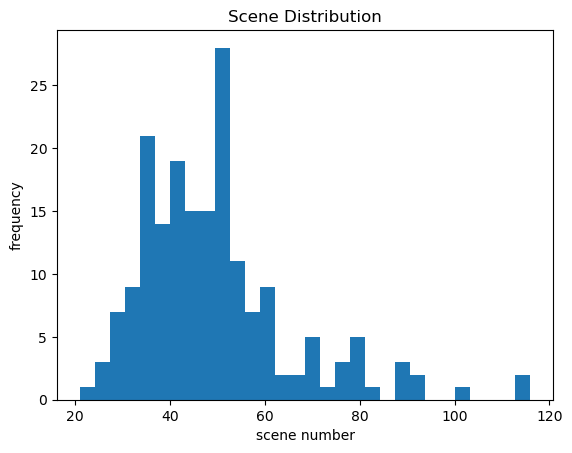

In [30]:
df[["season", "episode", "scene"]].drop_duplicates().groupby(["season", "episode"]).max().hist(grid=False, bins=30)
plt.title("Scene Distribution")
plt.ylabel("frequency")
plt.xlabel("scene number")
plt.show();

In [21]:
plt.figure(dpi=600);

<Figure size 3840x2880 with 0 Axes>

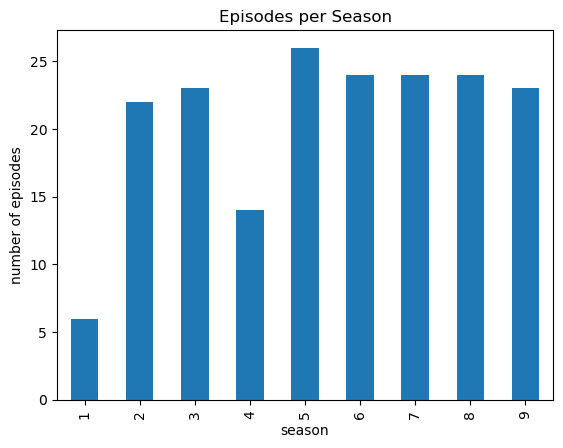

In [31]:
df[["season", "episode"]].drop_duplicates().groupby("season").count().plot.bar(legend=False)
plt.ylabel("number of episodes")
plt.title("Episodes per Season")
plt.show()

## Deleted Scenes

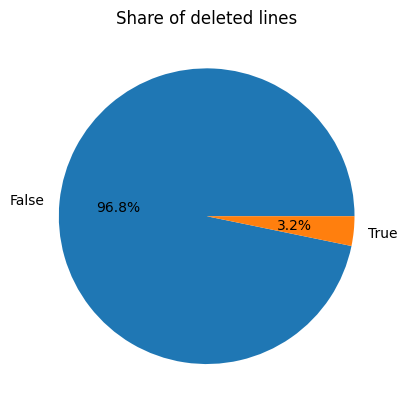

In [8]:
# show a pie chart of the share of deleted lines
df["deleted"].value_counts().plot.pie(autopct="%.1f%%")

plt.ylabel("")
plt.title("Share of deleted lines")
plt.show()

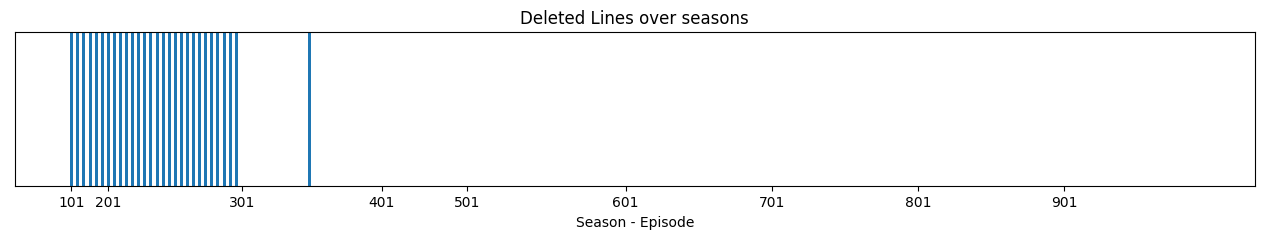

In [9]:
# show the deleted lines over the seasons
df["season_episode"] = df.apply(lambda x: f"{x['season']}{'0' if x['episode']<10 else ''}{x['episode']}", axis=1)

plt.figure(figsize=(16,2))
plt.scatter(df["season_episode"], df["deleted"].sort_index(), alpha=0.5, s=10, c="white")
plt.vlines(df["season_episode"].loc[df["deleted"]==True], ymin=0, ymax=1, linewidths=1)
plt.xticks(["101", "201", "301", "401", "501", "601", "701", "801", "901"])
plt.yticks([])
plt.ylim(0,1)
plt.xlabel("Season - Episode")
plt.title("Deleted Lines over seasons")
plt.show()

- deleted scenes only occur in the first 2 seasons (with one exception in season 3)
- therefore, they are not considered in the following analysis